In [1]:
import pandas as pd
import numpy as np
import openpyxl
import os
import glob
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

e:\Installation\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
e:\Installation\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
def read_excel(file):
    df = pd.read_excel(file)
    return df

dfs = []

# loop through all files in the folder and read them and append them to the list
index = 0

for file in glob.glob('../../Data/Processed data/*.xlsx'):
    print(file + " " + str(index))
    df = read_excel(file)
    dfs.append(df)
    index += 1

../../Data/Processed data\250 shojja.xlsx 0
../../Data/Processed data\31 shojja.xlsx 1
../../Data/Processed data\ad-din.xlsx 2
../../Data/Processed data\aichi.xlsx 3
../../Data/Processed data\Al manar.xlsx 4
../../Data/Processed data\Anowar khan.xlsx 5
../../Data/Processed data\azgol ali.xlsx 6
../../Data/Processed data\Delta medical.xlsx 7
../../Data/Processed data\Dhaka central.xlsx 8
../../Data/Processed data\dmd central.xlsx 9
../../Data/Processed data\h&h.xlsx 10
../../Data/Processed data\hfrc.xlsx 11
../../Data/Processed data\ibn sina.xlsx 12
../../Data/Processed data\islami bank.xlsx 13
../../Data/Processed data\lstm_dmc.xlsx 14
../../Data/Processed data\Medical college for women.xlsx 15
../../Data/Processed data\Metropoliton medical.xlsx 16
../../Data/Processed data\police hospital.xlsx 17
../../Data/Processed data\popular medical.xlsx 18
../../Data/Processed data\Sajeda hospital.xlsx 19
../../Data/Processed data\shomorita.xlsx 20
../../Data/Processed data\Square.xlsx 21
../../

In [3]:
coordinates = [(23.78023378522258, 90.36734693327269),
               (23.717878894611427, 90.37687614386095),
               (23.74854258987857, 90.4054805619277),
               (23.881790066203926, 90.40410896582604),
               (23.756052674223117, 90.36321845418024),
               (23.74530536688184, 90.38222402534431),
               (23.70789594683928, 90.42361642349367),
               (23.788602125062823, 90.35348610815265),
               (23.74361497588872, 90.38411443909085),
               (23.743909512744548, 90.38430874415275),
               (23.751892721210428, 90.38546900815183),
               (23.74692774941598, 90.40312845418005),
               (23.752132125860218, 90.41353537340008),
               (23.73972361480249, 90.4206285118513),
               (23.726327283426574, 90.39766652719375),
               (23.858439631417777, 90.40093773883972),
               (23.858439631417777, 90.40089482349694),
               (23.736396173493542, 90.41672412478748),
               (23.739433993904264, 90.38224623884184),
               (23.703267796399004, 90.3887789409448),
               (23.753565317444227, 90.3852717198413),
               (23.752951798763714, 90.38150615233585),
               (23.710654780247634, 90.40201004780278),
               (23.804802336161362, 90.41579431185583),
               (23.77636504355202, 90.39571531185526),
               (23.87475779737836, 90.39663462350299),
               ]

In [4]:
def preprocess(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].values.astype(float)
    #sort by date
    df = df.sort_values(by='Date')
    # for rows where df['Affected'] is null or non-numeric, replace with 0
    df['Affected'] = pd.to_numeric(df['Affected'], errors='coerce').fillna(0).astype(float)
    df.reset_index(drop=True, inplace=True)
    return df

In [5]:
i=1

for df in dfs:
    print(str(i))
    df = preprocess(df)
    print("done ")
    i+=1

1
done 
2
done 
3
done 
4
done 
5
done 
6
done 
7
done 
8
done 
9
done 
10
done 
11
done 
12
done 
13
done 
14
done 
15
done 
16
done 
17
done 
18
done 
19
done 
20
done 
21
done 
22
done 
23
done 
24
done 
25
done 
26
done 


In [6]:
# find distance between two coordinates
def distance(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

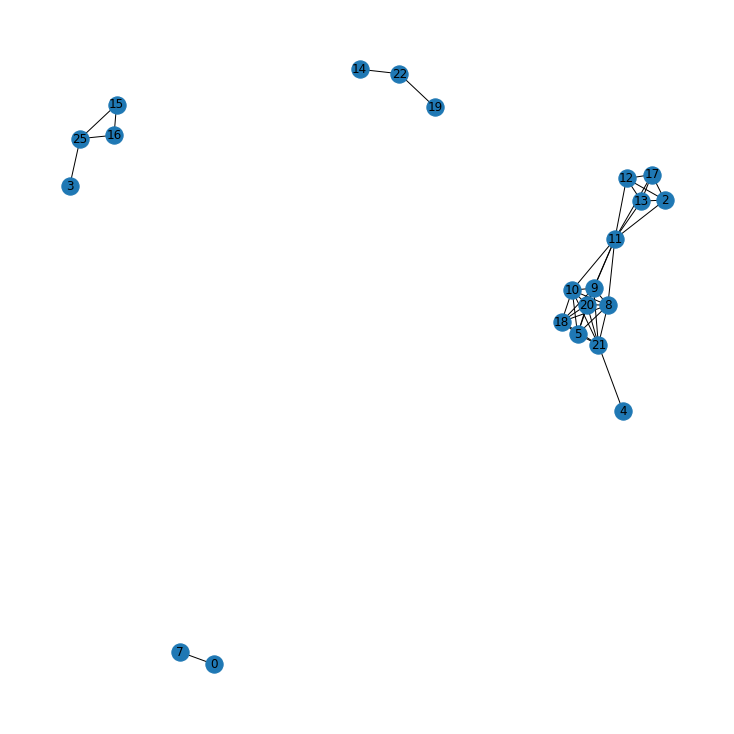

In [11]:
#make a graph where each hospital is a node and if the distance between two hospitals is less than 5km, then there is an edge between them

import networkx as nx
G = nx.Graph()

for i in range(len(coordinates)):
    for j in range(i+1, len(coordinates)):
        if distance(coordinates[i][0], coordinates[i][1], coordinates[j][0], coordinates[j][1]) < 2:
            G.add_edge(i, j)

#plot the graph
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)
plt.show()

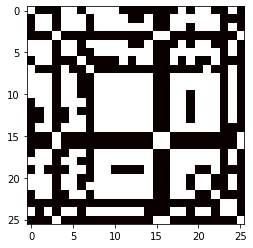

In [8]:
# plot the graph
plt.imshow(graph, cmap='hot', interpolation='nearest')
plt.show()